## Dependencies

In [11]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

vader = SentimentIntensityAnalyzer()

### Load dataset

In [2]:
df = pd.read_csv(r"../data/processed/top_150_fantasy_reviews_cleaned.csv")
df.head()

,review_id,anime_title,review_url,date,username,user_review_count,is_preliminary,episodes_watched,recommendation,rating,...,total_reactions,nice_count,love_it_count,funny_count,confusing_count,informative_count,well_written_count,creative_count,review_sentiment,review_nerpos
0,503754,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503754,"Oct 13, 2023 8:38 AM",Czekaj,5,True,5/28,Recommended,10,...,1347,281,833,44,58,5,124,2,with lives so short why do we even bother? to...,"With lives so short, why do we even bother? To..."
1,519189,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519189,"Mar 22, 2024 12:40 PM",chekkit,25,False,NaN,Recommended,10,...,1211,248,789,43,50,8,70,3,i feel so catered to it feels like an eternit...,I feel so catered to. It feels like an eternit...
2,519472,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519472,"Mar 24, 2024 2:03 AM",Trikkiez,3,False,NaN,Not Recommended,4,...,4219,630,105,1966,1355,29,123,11,style frieren does not have its own unique st...,Style- Frieren does not have its own unique st...
3,512466,Sousou no Frieren,https://myanimelist.net/reviews.php?id=512466,"Jan 12, 2024 11:25 AM",ShabbaRico,12,True,18/28,Not Recommended,5,...,931,183,28,400,267,9,42,2,tl dr 5 10 i do not recommend this for anyon...,"TL;DR: 5/10, I do not recommend this for anyon..."
4,503760,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503760,"Oct 13, 2023 9:10 AM",TheRealist68,16,True,6/28,Mixed Feelings,9,...,953,412,60,31,314,10,122,4,through 3 episodes frieren appears to be a un...,"Through 3 episodes, Frieren appears to be a un..."


## TextBlob Sentiment Analysis

In [3]:
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return pd.Series({
        "textblob_polarity": blob.sentiment.polarity,
        "textblob_subjectivity": blob.sentiment.subjectivity
    })

df[['textblob_polarity', 'textblob_subjectivity']] = df['review_sentiment'].apply(get_textblob_sentiment)

In [4]:
def label_polarity(p):
    if p > 0.1:
        return 'positive'
    elif p < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['textblob_label'] = df['textblob_polarity'].apply(label_polarity)

In [5]:
df.head()

,review_id,anime_title,review_url,date,username,user_review_count,is_preliminary,episodes_watched,recommendation,rating,...,funny_count,confusing_count,informative_count,well_written_count,creative_count,review_sentiment,review_nerpos,textblob_polarity,textblob_subjectivity,textblob_label
0,503754,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503754,"Oct 13, 2023 8:38 AM",Czekaj,5,True,5/28,Recommended,10,...,44,58,5,124,2,with lives so short why do we even bother? to...,"With lives so short, why do we even bother? To...",0.087698,0.506092,neutral
1,519189,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519189,"Mar 22, 2024 12:40 PM",chekkit,25,False,NaN,Recommended,10,...,43,50,8,70,3,i feel so catered to it feels like an eternit...,I feel so catered to. It feels like an eternit...,0.188848,0.523496,positive
2,519472,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519472,"Mar 24, 2024 2:03 AM",Trikkiez,3,False,NaN,Not Recommended,4,...,1966,1355,29,123,11,style frieren does not have its own unique st...,Style- Frieren does not have its own unique st...,-0.000063,0.544437,neutral
3,512466,Sousou no Frieren,https://myanimelist.net/reviews.php?id=512466,"Jan 12, 2024 11:25 AM",ShabbaRico,12,True,18/28,Not Recommended,5,...,400,267,9,42,2,tl dr 5 10 i do not recommend this for anyon...,"TL;DR: 5/10, I do not recommend this for anyon...",0.074623,0.449968,neutral
4,503760,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503760,"Oct 13, 2023 9:10 AM",TheRealist68,16,True,6/28,Mixed Feelings,9,...,31,314,10,122,4,through 3 episodes frieren appears to be a un...,"Through 3 episodes, Frieren appears to be a un...",0.136992,0.483176,positive


## Vader Sentiment Analysis

In [6]:
def get_vader_sentiment(text):
    scores = vader.polarity_scores(text)
    return pd.Series({
        'vader_neg': scores['neg'],
        'vader_neu': scores['neu'],
        'vader_pos': scores['pos'],
        'vader_compound': scores['compound']
    })

df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = df['review_sentiment'].apply(get_vader_sentiment)

In [7]:
def label_vader(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_label'] = df['vader_compound'].apply(label_vader)

In [8]:
df.head()

,review_id,anime_title,review_url,date,username,user_review_count,is_preliminary,episodes_watched,recommendation,rating,...,review_sentiment,review_nerpos,textblob_polarity,textblob_subjectivity,textblob_label,vader_neg,vader_neu,vader_pos,vader_compound,vader_label
0,503754,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503754,"Oct 13, 2023 8:38 AM",Czekaj,5,True,5/28,Recommended,10,...,with lives so short why do we even bother? to...,"With lives so short, why do we even bother? To...",0.087698,0.506092,neutral,0.068,0.853,0.079,0.8890,positive
1,519189,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519189,"Mar 22, 2024 12:40 PM",chekkit,25,False,NaN,Recommended,10,...,i feel so catered to it feels like an eternit...,I feel so catered to. It feels like an eternit...,0.188848,0.523496,positive,0.051,0.757,0.192,0.9987,positive
2,519472,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519472,"Mar 24, 2024 2:03 AM",Trikkiez,3,False,NaN,Not Recommended,4,...,style frieren does not have its own unique st...,Style- Frieren does not have its own unique st...,-0.000063,0.544437,neutral,0.096,0.782,0.122,0.9958,positive
3,512466,Sousou no Frieren,https://myanimelist.net/reviews.php?id=512466,"Jan 12, 2024 11:25 AM",ShabbaRico,12,True,18/28,Not Recommended,5,...,tl dr 5 10 i do not recommend this for anyon...,"TL;DR: 5/10, I do not recommend this for anyon...",0.074623,0.449968,neutral,0.062,0.823,0.115,0.9991,positive
4,503760,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503760,"Oct 13, 2023 9:10 AM",TheRealist68,16,True,6/28,Mixed Feelings,9,...,through 3 episodes frieren appears to be a un...,"Through 3 episodes, Frieren appears to be a un...",0.136992,0.483176,positive,0.036,0.818,0.146,0.9981,positive


### Save Cleaned Dataset

In [9]:
df.to_csv(r'../data/processed/top_150_fantasy_reviews_sentiment.csv', index=False)

## Viz

#### Jumlah Review per Label Sentimen (TextBlob & VADER)

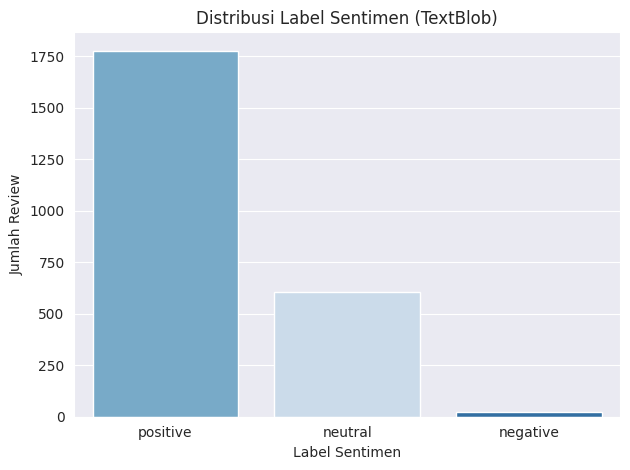

In [20]:
sns.countplot(data=df, x='textblob_label', order=['positive', 'neutral', 'negative'], palette='Blues', hue='textblob_label')
plt.title('Distribusi Label Sentimen (TextBlob)')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Review')
plt.tight_layout()
plt.show()

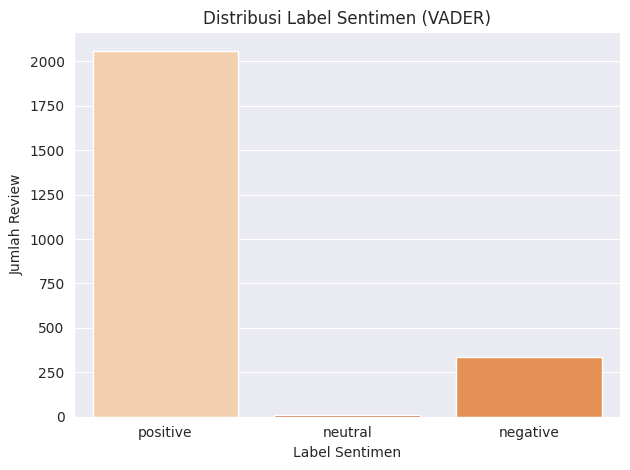

In [21]:
sns.countplot(data=df, x='vader_label', order=['positive', 'neutral', 'negative'], palette='Oranges', hue='vader_label')
plt.title('Distribusi Label Sentimen (VADER)')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Review')
plt.tight_layout()
plt.show()

#### Distribusi Skor Polarity dan Compound

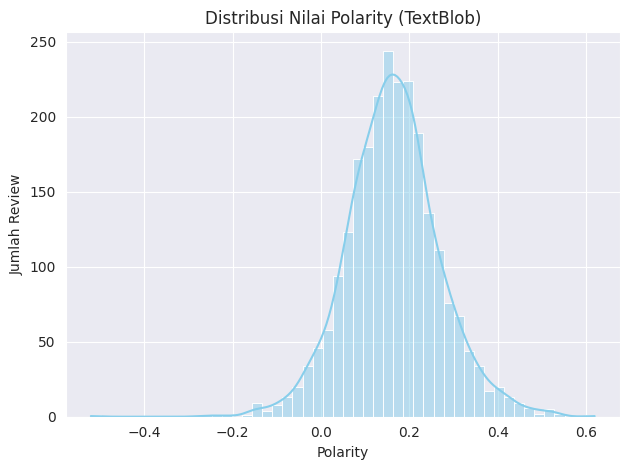

In [27]:
sns.histplot(df['textblob_polarity'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Nilai Polarity (TextBlob)')
plt.xlabel('Polarity')
plt.ylabel('Jumlah Review')
plt.tight_layout()
plt.show()


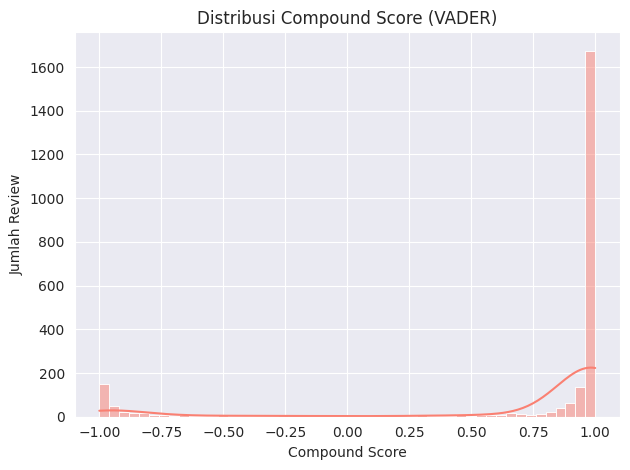

In [28]:
sns.histplot(df['vader_compound'], bins=50, kde=True, color='salmon')
plt.title('Distribusi Compound Score (VADER)')
plt.xlabel('Compound Score')
plt.ylabel('Jumlah Review')
plt.tight_layout()
plt.show()


#### Boxplot: Sentimen vs Rating Numerik

/tmp/ipykernel_16118/1514430461.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='textblob_label', y='rating', order=['positive', 'neutral', 'negative'], palette='pastel')


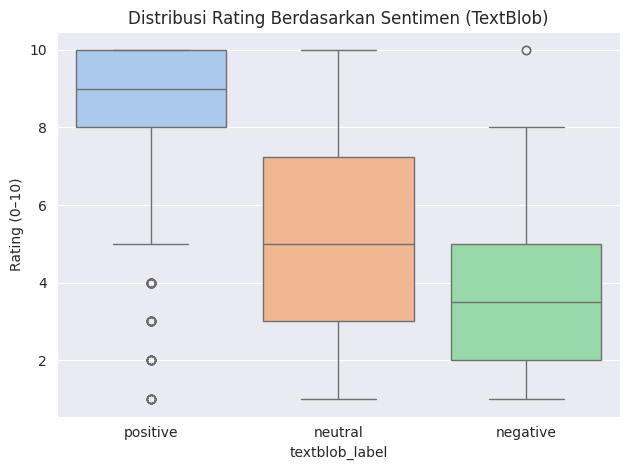

In [29]:
sns.boxplot(data=df, x='textblob_label', y='rating', order=['positive', 'neutral', 'negative'], palette='pastel')
plt.title('Distribusi Rating Berdasarkan Sentimen (TextBlob)')
plt.ylabel('Rating (0–10)')
plt.tight_layout()
plt.show()


#### Barplot: Rata-rata Reaksi Pengguna Berdasarkan Sentimen

/tmp/ipykernel_16118/2357972198.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='textblob_label', y='total_reactions', estimator='mean', palette='muted')


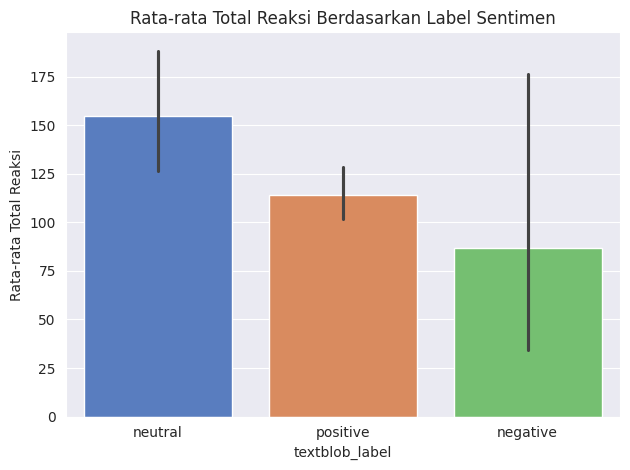

In [30]:
sns.barplot(data=df, x='textblob_label', y='total_reactions', estimator='mean', palette='muted')
plt.title('Rata-rata Total Reaksi Berdasarkan Label Sentimen')
plt.ylabel('Rata-rata Total Reaksi')
plt.tight_layout()
plt.show()


#### Rekomendasi vs Rating (Bar Plot)

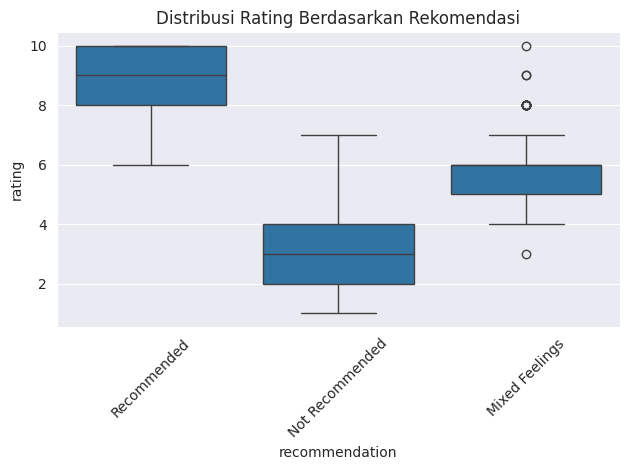

In [32]:
sns.boxplot(data=df, x='recommendation', y='rating')
plt.title('Distribusi Rating Berdasarkan Rekomendasi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
